# **Introduction**

This is a Case Study project. Where we will be analyzing a company named 'Cyclistic', a bike sharing company based in Chicago. Cyclistic features more than 5,800 bikes and 600 docking stations throughout the state of Chicago. Our job for this Case Study is to analyze historical data to identify trends on how annual and casual riders use Cyclistic bikes differently. Which will then help us form some recommendations on how to convert casual riders into annual members. Also recommend ways the marketing team can use digital media to influence casual riders to become members.

# **Phase #1- ASK**

**Business Task:** 
* To analyze Cylistics historical data trends and figure out how annual members and causal members use Cyclistic bicycles differently. 

**Stakeholders:**
* Lily Moreno- The director of marketing
* Cyclistic Executive Team- Will decide whether to approve the recommendations based off the analysis 
* Marketing Team


# **Phase #2-PREPARE**

* We were given 12 months of Cyclistic trip data. The data was made available by Motivate International Inc. The data measures quarter 2,3 and 4 of 2019 and quarter 1 of 2020.

# **Phase #3-PROCESS**

* We will be using R program to organize, clean, analyze and visualize the data.

**Installing and loading up the packages we will use**

We will install the packages: 'tidyverse'(Allowing us to manipulate, explore and visualize), 'lubridate'(Makes it easier to work with dates and times), 'ggplot2(For visualization), skimr(Helps summarize data easily), 'janitor'(Simplify data cleaning)

In [1]:
install.packages("tidyverse")
library(tidyverse)
library(lubridate)
install.packages("ggplot2")
library(ggplot2)
install.packages("janitor")
library(janitor)
install.packages("skimr")
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vctrs’


Warning message in install.packages("ggplot2"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as

**Loading the csv files we will use**

In [2]:
q2_2019 <- read_csv("/kaggle/input/bike-share-datasets/Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("/kaggle/input/bike-share-datasets/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("/kaggle/input/bike-share-datasets/Divvy_Trips_2019_Q4.csv")
q1_2020 <- read_csv("/kaggle/input/bike-share-datasets/Divvy_Trips_2020_Q1.csv")

Rows: 1108163 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
num  (1): 01 - Rental Details Duration In Seconds Uncapped
dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1640718 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col

**Explore datasets a little further**

We will first compare the column names

In [3]:
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)
colnames(q1_2020)

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

**Analysis:** We notice that q3 and q4 of 2019 have the same column names, in the same order. q2 2019 and q1 2020 are a little different

**Explore columns information** 

In [4]:
head(q2_2019)
head(q3_2019)
head(q4_2019)
head(q1_2020)

01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999


trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,1214,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,1048,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NA,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,1554,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,1503,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,1213,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990


trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:05,2020-01-10 12:37:54,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member


**Renaming columns**

Before joining datasets we want the column names to match up. The column names changed in q1 2020, so we want to work with the most updated format.

In [5]:
q2_2019 <- rename(q2_2019, ride_id="01 - Rental Details Rental ID",
                  rideable_type="01 - Rental Details Bike ID",
                  started_at="01 - Rental Details Local Start Time",
                  ended_at="01 - Rental Details Local End Time",
                  start_station_name="03 - Rental Start Station Name",
                  start_station_id="03 - Rental Start Station ID",
                  end_station_name="02 - Rental End Station Name",
                  end_station_id="02 - Rental End Station ID",
                  member_casual="User Type")

q3_2019 <- rename(q3_2019, ride_id=trip_id,
                  rideable_type=bikeid,
                  started_at=start_time,
                  ended_at=end_time,
                  start_station_name=from_station_name,
                  start_station_id=from_station_id,
                  end_station_name=to_station_name,
                  end_station_id=to_station_id,
                  member_casual=usertype)

q4_2019 <- rename(q4_2019, ride_id=trip_id,
                  rideable_type=bikeid,
                  started_at=start_time,
                  ended_at=end_time,
                  start_station_name=from_station_name,
                  start_station_id=from_station_id,
                  end_station_name=to_station_name,
                  end_station_id=to_station_id,
                  member_casual=usertype)

**Removing unwanted column names**

We will remove columns names that do not match up with one another, that we will not be using.

In [6]:
q2_2019 <- q2_2019 %>% 
  select(-c("01 - Rental Details Duration In Seconds Uncapped", "Member Gender", "05 - Member Details Member Birthday Year"))
q3_2019 <- q3_2019 %>% 
  select(-c("tripduration", "gender", "birthyear"))
q4_2019 <- q4_2019 %>% 
  select(-c("tripduration", "gender", "birthyear"))
q1_2020 <- q1_2020 %>% 
  select(-c(start_lat, start_lng, end_lat,end_lng))

**Explore columns data type**

Lets check out the columns data types, to make sure they are consistent all the way through. So they are easy to stack when we join datasets.

In [7]:
str(q1_2020)
str(q2_2019)
str(q3_2019)
str(q4_2019)

tibble [426,887 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ member_casual     : chr [1:426887] "member" "member" "member" "member" ...
tibble 

**Analysis:** We notice that q1_2020 ride_id is a (chr) & rideable_type is also a (chr) data type. While the other ride_id and rideable_type have a (num) data type.

**Convert 'ride_id' to (chr) data type**

Here we will convert ride_id to a (chr) data type in all tables to make them similar and stackable when joining datasets later on.

In [8]:
q4_2019 <- mutate(q4_2019, ride_id=as.character(ride_id),
          rideable_type=as.character(rideable_type))
q3_2019 <- mutate(q3_2019, ride_id=as.character(ride_id),
                  rideable_type=as.character(rideable_type))
q2_2019 <- mutate(q2_2019, ride_id=as.character(ride_id),
                  rideable_type=as.character(rideable_type))

**Stack the datasets all in one table**

In [9]:
all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

**Inspect new stacked dataset**

We will now take a look at the new stacked dataset. First we will look at the column names.

In [10]:
colnames(all_trips)

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

**Take a look at the columns data types** 

In [11]:
str(all_trips)

tibble [3,879,822 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


**How many rows of information we will be working with**

In [12]:
nrow(all_trips)

[1] 3879822

**Explore small summary of the dataset**

In [13]:
head(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber


**Analysis:** We notice in the 'member_casual' column that there are 4 choices (member, casual, Subscriber and customer). We noticed that in q1 2020 they changed the column to show customers with memberships= 'member' and non membership customers= 'casual'. So we want to change this caolumn to only show these 2 choices.

**Convert Subscribers = member and Customer = casual**

In [14]:
all_trips <- all_trips %>% 
  mutate(member_casual=recode(member_casual, "Subscriber"="member", "Customer"="casual"))

**Check to see if 'member_casual' column was changed**

In [15]:
table(all_trips$member_casual)


 casual  member 
 905954 2973868 

**Add in columns that break down the date, day, month, year and day of the week of each ride**

In [16]:
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_the_week <- format(as.Date(all_trips$date),"%A")

**Figure out the trip duration in seconds for each ride**

In [17]:
all_trips$tripduration <- difftime(all_trips$ended_at, all_trips$started_at)

**What data types are our newley formed columns in**

In [18]:
str(all_trips)

tibble [3,879,822 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "member" "member" "member" "member" ...
 $ date              : Date[1:3879822], format: "2019-04-01"

**What data type is "tripduration" in**

In [19]:
typeof(all_trips$tripduration)

[1] "double"

**Analysis:** We see that the 'tripduration' data type is in 'double'(a decimal format), but we want to make it numeric so we can do some calculations.

**Changing 'tripduration' to a numeric data type**

Here we will change the 'tripduration' data type to numeric. Then check to see if the data type was actually changed to numeric afterwards

In [20]:
all_trips$tripduration <- as.numeric(as.character(all_trips$tripduration))
is.numeric(all_trips$tripduration)

[1] TRUE

**Exploring 'start station name' column**

While exploring the start station column, we notice that some stations are 'HQ QR'. We know that at these locations bikes were checked out for inspection and not for customer use. So first we want to find out how many of the start station names are actually "HQ QR".

In [21]:
length(which(all_trips$start_station_name=="HQ QR"))

[1] 3767

**Analysis:** We realized that there are 3767 rows with the start station at HQ QR. We want to remove these rows.

**Removing 'HQ QR' rows**

We will remove the rows that have a starting station at HQ QR and are less than 0 in tripduration

In [22]:
all_trips_2 <- all_trips [!(all_trips$start_station_name == "HQ QR"| all_trips$tripduration <0),]

**'Tripduration' stats summary in seconds**

Lets get a quick summary of tripdurations (in seconds) mean, max, median and average

In [23]:
summary(all_trips_2$tripduration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     412     712    1479    1289 9387024 

**Add'tripduration column in minutes**

We want to see trip duration in minutes, so we added a minutes column

In [24]:
all_trips_2 <- all_trips_2 %>% 
  mutate(tripduration_min = tripduration/60)

**'Tripduration' stats summary in minutes**

We want to see the summary of trip duration(in minutes) for mean,max,min,median and average.

In [25]:
summary(all_trips_2$tripduration_min)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.02      6.87     11.87     24.65     21.48 156450.40 

**Compare member and casual users**

In [26]:
aggregate(all_trips_2$tripduration_min ~ all_trips_2$member_casual, FUN = mean)
aggregate(all_trips_2$tripduration_min ~ all_trips_2$member_casual, FUN = max)
aggregate(all_trips_2$tripduration_min ~ all_trips_2$member_casual, FUN = median)
aggregate(all_trips_2$tripduration_min ~ all_trips_2$member_casual, FUN = min)

all_trips_2$member_casual,all_trips_2$tripduration_min
<chr>,<dbl>
casual,59.21250
member,14.16777


all_trips_2$member_casual,all_trips_2$tripduration_min
<chr>,<dbl>
casual,156450.4
member,150943.9


all_trips_2$member_casual,all_trips_2$tripduration_min
<chr>,<dbl>
casual,25.766667
member,9.816667


all_trips_2$member_casual,all_trips_2$tripduration_min
<chr>,<dbl>
casual,0.03333333
member,0.01666667


**Explore the average trip duration for each day, by both users**

In [27]:
all_trips_2_DayOfWeek_mean <- aggregate(all_trips_2$tripduration_min ~ all_trips_2$member_casual + all_trips_2$day_of_the_week, FUN = mean)

**Analysis:** Here by just looking at the mean numbers for each day of the week for each both user types. We see that 'causal' riders have a longer average trip duration all the days of the week compared to the 'members'.

**Putting the days of the week in order**

In [28]:
all_trips_2$day_of_the_week <- ordered(all_trips_2$day_of_the_week, levels=c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"))

**Analysis:** Now that the days are in order we can look at the average trip duration by each day for both users again. This time the days are in order.

**Explore average tripduration with days of the week in order**

In [29]:
all_trips_2_DayOfWeek_mean <- aggregate(all_trips_2$tripduration_min ~ all_trips_2$member_casual + all_trips_2$day_of_the_week, FUN = mean)

**We will analyze ridership data type and weekday**

* First pipe creates weekday field using wday(). We use label=TRUE so it shows up as an ordered factor and not a decimal.
* Second pipe groups it by the usertype and weekday
* Third pipe calculates the number of rides and average trip duration
* Forth pipe sorts

In [30]:
all_trips_3 <- all_trips_2 %>% 
  mutate(weekday=wday(started_at,label=TRUE)) %>% 
  group_by(member_casual,weekday) %>% 
  summarise(number_of_rides=n(), average_duration_min=mean(tripduration_min)) %>% 
  arrange(member_casual,weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


**Counting the number of start station names**

In [31]:
Start_station <- all_trips %>% 
   count(start_station_name) %>% 
   arrange(n)

**Analysis:** We see that most users take bikes from the 'Streeter Dr & Grand Ave', 'Canal St & Adams St' and 'Lake Shore Dr & Monroe St' station.

# **Phase #4 & #5-ANALYZE/SHARE**

**Visualization of both user type in relation to the number of rides each day of the week**

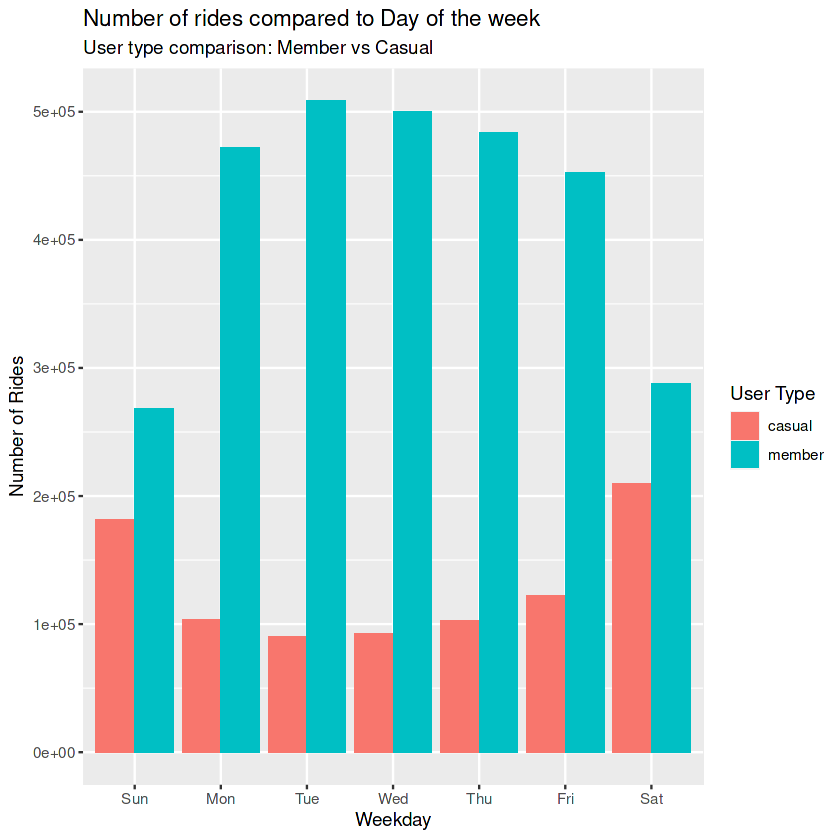

In [32]:
all_trips_3 %>% 
  ggplot(mapping=aes(x=weekday, y=number_of_rides, fill=member_casual))+
  geom_col(position = "dodge")+
  labs(title = "Number of rides compared to Day of the week", subtitle="User type comparison: Member vs Casual", x="Weekday", y="Number of Rides")+
  guides(fill=guide_legend(title="User Type"))

**Analysis:** In this graph we see that the "members" take far more trips each day than "cusual" users. We also can see that the higher number of rides for "casual" members are on Saturday and Sunday. The highest number of rides for "members" are Tuesday followed by Wednesday.

**Visualization of both user type in relation to the average trip duration each day of the week**

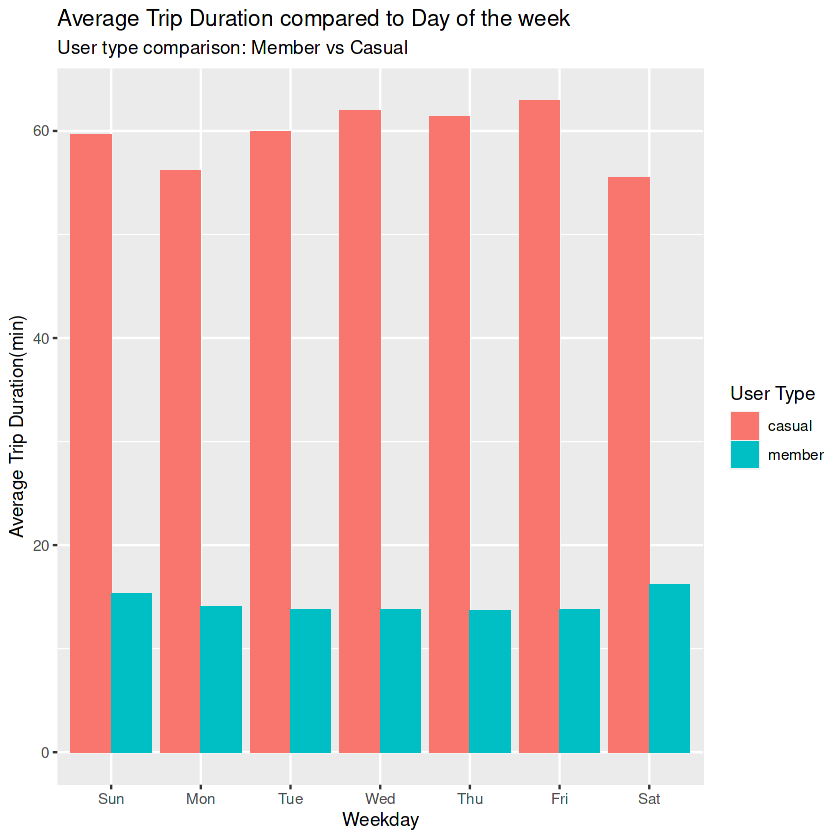

In [33]:
all_trips_3 %>% 
  ggplot(mapping=aes(x=weekday, y=average_duration_min, fill=member_casual))+
  geom_col(position = "dodge")+
  labs(title = "Average Trip Duration compared to Day of the week", subtitle="User type comparison: Member vs Casual", x="Weekday", y="Average Trip Duration(min)")+
  guides(fill=guide_legend(title="User Type"))

**Analysis:** In this graph we see that "casual" users, each day of the week had the longest average trip duration compared to the "member" user type. So from the last two graphs we see that there are not as many 'casual' users taking trips compared to actual 'members'. But when they do take trips, the trip duration fat exceeds those of actual 'members'. Actual 'members' number of trips far exceeds those of 'casual' users. But their trip duration are less.

**Analyze ridership data type and month**

In [34]:
all_trips_4 <- all_trips_2 %>% 
  mutate(month=month(started_at,label=TRUE)) %>% 
  group_by(member_casual,month) %>% 
  summarise(number_of_rides=n(), average_duration_min=mean(tripduration_min)) %>% 
  arrange(member_casual,month)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


**Put the months in order**

In [35]:
all_trips_4$month <- ordered(all_trips_4$month, levels=c("Jan","Feb","Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

**Visualize both user types. Comparing the number of rides to months**

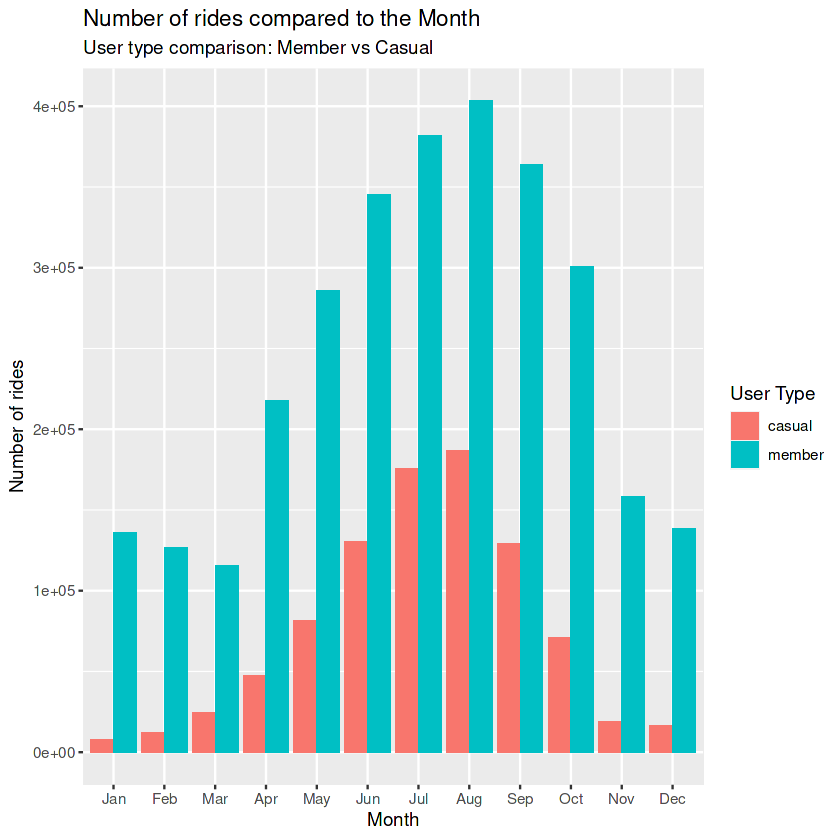

In [36]:
all_trips_4 %>% 
  ggplot(mapping = aes(x=month,y=number_of_rides, fill=member_casual))+
  geom_col(position = "dodge")+
  labs(title ="Number of rides compared to the Month", subtitle ="User type comparison: Member vs Casual", x="Month", y="Number of rides")+
  guides(fill=guide_legend(title="User Type"))

**Analysis:** We see that for both user types, that the highest number of rides are in the months of (June, July, August and September). While doing a quick search we realize these are the months of start/end of summer. Also can see that August is the highest month with the most number of rides, for both users.

# **Phase #6-ACT**

**Recommendations:**

* The ride number goes down in the months of (Nov, Dec, Jan, Feb), the winter months. Which I believe is completely understandable. It is not ideal to ride a bike during the colder seasons. But I would recommend discounting memberships to 'casual' riders during the winter months before the warmer months come. So, when the warmer months come around and the trip number starts to multiply, at least the new ‘members’ know their set and can take out a bike as any times as they want during the warmer months. 

* Since we know that casual riders have longer trip duration. We can create ads/promotions towards casual riders that take long bike trips.

* We can also push membership promotions at the top 3 start stations which are 'Streeter Dr & Grand Ave', 'Canal St & Adams St' and 'Lake Shore Dr & Monroe St'.

* Create attractive promotions to entice casual users to use Cyclistic services during the weekdays, to help the number of trips to increase. 
